In [1]:
from utils.body import BODY_CONNECTIONS
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
sns.set_style('darkgrid')

In [3]:
keypoints = np.load('keypoints_sequences.npy')
labels = np.load('labels.npy')

# keypoints = np.load('data/augmentation/keypoints_sequences_vae.npy')
# labels = np.load('data/augmentation/labels_vae.npy')

keypoints.shape, labels.shape

((111, 20, 34), (111,))

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(keypoints, labels, test_size=0.2, random_state=42)
X_val, y_val = X_test[:len(X_test)//2], y_test[:len(y_test)//2]
X_test, y_test = X_test[len(X_test)//2:], y_test[len(y_test)//2:]

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# Crear DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
val_dataset = TensorDataset(X_val, y_val)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

(torch.Size([88, 20, 34]),
 torch.Size([88]),
 torch.Size([12, 20, 34]),
 torch.Size([12]),
 torch.Size([11, 20, 34]),
 torch.Size([11]))

In [92]:
from src.models import FallDetectionGRU
from src.training import train_model

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model = FallDetectionGRU(
    input_size=34, 
    hidden_size=64, 
    num_layers=2, 
    output_size=1, 
    dropout_prob=0.6
)

trained_model, history = train_model(
    model, 
    train_loader, 
    val_loader, 
    num_epochs=300,
    learning_rate=.0005,
    weight_decay=1e-6, 
    patience=15
)

Epoch 5: Train Loss: 0.8428, Train Acc: 0.5682 | Val Loss: 0.5560, Val Acc: 1.0000
Epoch 10: Train Loss: 0.7115, Train Acc: 0.6250 | Val Loss: 0.4423, Val Acc: 1.0000
Epoch 15: Train Loss: 0.6086, Train Acc: 0.6364 | Val Loss: 0.2575, Val Acc: 1.0000
Epoch 20: Train Loss: 0.4969, Train Acc: 0.7159 | Val Loss: 0.1775, Val Acc: 1.0000
Epoch 25: Train Loss: 0.4810, Train Acc: 0.7159 | Val Loss: 0.1551, Val Acc: 1.0000
Epoch 30: Train Loss: 0.3765, Train Acc: 0.8182 | Val Loss: 0.1158, Val Acc: 1.0000
Epoch 35: Train Loss: 0.3239, Train Acc: 0.8523 | Val Loss: 0.0868, Val Acc: 1.0000
Epoch 40: Train Loss: 0.2802, Train Acc: 0.8864 | Val Loss: 0.0561, Val Acc: 1.0000
Epoch 45: Train Loss: 0.2232, Train Acc: 0.9091 | Val Loss: 0.0389, Val Acc: 1.0000
Epoch 50: Train Loss: 0.3706, Train Acc: 0.8864 | Val Loss: 0.1135, Val Acc: 1.0000
Epoch 55: Train Loss: 0.2665, Train Acc: 0.8750 | Val Loss: 0.0467, Val Acc: 1.0000
Epoch 60: Train Loss: 0.2368, Train Acc: 0.8864 | Val Loss: 0.0216, Val Acc: 

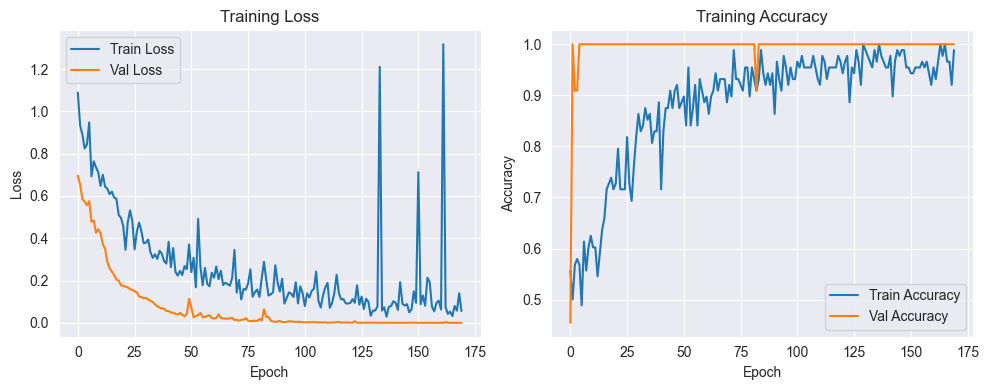

In [93]:
from src.training import plot_training_history

plot_training_history(history)

In [94]:
from src.evaluation import evaluate_model

metrics = evaluate_model(trained_model, test_loader)

🔍 Evaluación del modelo:
📉 Test Loss: 0.0083
✅ Accuracy: 1.0000
🎯 Precision: 1.0000
🔄 Recall: 1.0000
⭐ F1 Score: 1.0000


In [101]:
# guardar pesos
torch.save(model.state_dict(), 'models/gru_model.pth')

# Guardar modelo completo
torch.save(model, 'models/gru_model_full.pth')

In [156]:
from utils.video_detect_falls import video_detect_falls

video_detect_falls(
    # 'data/videos/ways to fall/stubbed-toe/stubbed-toe.mp4',
    '15(1).mp4',
    'models/yolo11x-pose.pt',
    model,
    show_pose=True,
    record=True,
)


0: 384x640 1 person, 1147.7ms
Speed: 1.6ms preprocess, 1147.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1167.0ms
Speed: 2.5ms preprocess, 1167.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 954.5ms
Speed: 2.9ms preprocess, 954.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1000.0ms
Speed: 4.2ms preprocess, 1000.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 887.3ms
Speed: 6.6ms preprocess, 887.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 870.9ms
Speed: 7.3ms preprocess, 870.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 918.8ms
Speed: 4.1ms preprocess, 918.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 944.6ms
Speed: 4.3ms preprocess, 944.6ms inference, 0.8ms postprocess per im

In [102]:
true_labels = []
predicted_labels = []

for i, (X_batch, y_batch) in enumerate(test_loader):
    with torch.no_grad():
        predictions = trained_model(X_batch)
        predictions = predictions.squeeze().numpy()
        true_labels.extend(y_batch.numpy())
        predicted_labels.extend(predictions)
        
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

from sklearn.metrics import classification_report, confusion_matrix

threshold = 0.9
predicted_labels_binary = predicted_labels > threshold

print(classification_report(true_labels, predicted_labels_binary))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



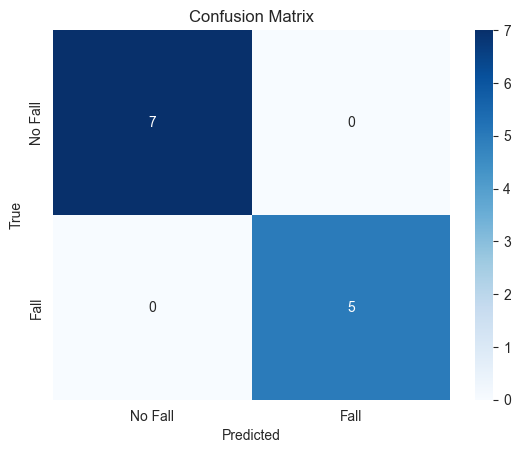

In [154]:
conf_matrix = confusion_matrix(true_labels, predicted_labels_binary)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fall', 'Fall'], yticklabels=['No Fall', 'Fall'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# load model

model = FallDetectionGRU(
    input_size=34, 
    hidden_size=64, 
    num_layers=2, 
    output_size=1, 
    dropout_prob=.6
)

model.load_state_dict(torch.load('models/gru_model.pth'))